# InstaBot - Part 2

In [72]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#opening the browser, change the path as per location of chromedriver in your system
driver = webdriver.Chrome(executable_path = 'C:/Users/admin/Downloads/Chromedriver/chromedriver.exe')
driver.maximize_window()

In [3]:
#opening instagram
driver.get('https://www.instagram.com/')

In [4]:
#update your username and password here
username = 'SAMPLE USERNAME'
password = 'SAMPLE PASSWORD'

In [5]:
#initializing  wait object
wait = WebDriverWait(driver, 10)

In [6]:
#LogIn() function is same as part-I. All the functionality is same as before.
def LogIn(username, password):
    try :
        #locating username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user_name.send_keys(username)
        #locating password box and sending password
        pwd = driver.find_element_by_name('password')
        pwd.send_keys(password)
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        button.submit()
        #Save Your Login Info? : Not Now
        pop = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/div/div/div/button')))
        pop.click()
        
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [7]:
#Login to your Instagram Handle
LogIn(username, password)

In [8]:
##search_open_profile() function is same as part-I. All the functionality is same as before.
def search_open_profile(s):
    try:
        #locatong search box bar and sending text 
        search_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'XTCLo')))
        search_box.send_keys(s)
        #locating serched result
        res = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d')))
        res.click()           

        time.sleep(5)
        #driver.back()
    
    except TimeoutException :
        print('No Search Found!')
    

### Problem 1 : Analyse the habits of bloggers
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.    
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers  
2.Now Find the number of posts these handles have done in the previous 3 days.  
3.Depict this information using a suitable graph.  

##### 1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [9]:
#First 10 handles from part-1
handles_list = ['dilsefoodie','foodtalkindia','foodmaniacinthehouse','food.darzee','yourfoodlab','dilsefoodie_','food',
               'foodnetwork','foodinsider','foodiesfeature']

In [10]:
#function for getting top 5 handle which have highest number of followers
def top_5_handles(lst):
    try:
        #dct contains username with number of followers
        dct = {}
        for i in lst :
            #This fuction will search a user and open that profile
            search_open_profile(i)
            time.sleep(2)
            #locating followers of user
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
            #replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [11]:
top_handles = top_5_handles(handles_list)

In [12]:
print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,'->',top_handles[uname])

Top 5 instagram handles which have the highest number of followers :
foodnetwork -> 10660374
foodinsider -> 2179026
yourfoodlab -> 1427415
dilsefoodie -> 630688
foodtalkindia -> 302538


##### 2.Now Find the number of posts these handles have done in the previous 3 days.

In [13]:
#this function returns number of post posted by user in n days
def count_of_post(day):
    try :
        #locating first post
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        post.click()
        
        count = 0 
        while True :
            #getting date of the the post
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_1o9PC')))
            #getting date in string format
            date_string = temp.get_attribute('datetime')
            #converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day :
                break
            else :
                count += 1
            #locating next button
            next_but = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            next_but.click()
        #closing the post
        close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [14]:
total_post_count = {}
for i in top_handles :
    search_open_profile(i)
    time.sleep(2)
    count = count_of_post(3)
    total_post_count[i] = count

In [15]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
foodnetwork 35
foodinsider 3
yourfoodlab 4
dilsefoodie 4
foodtalkindia 3


##### 3.Depict this information using a suitable graph.

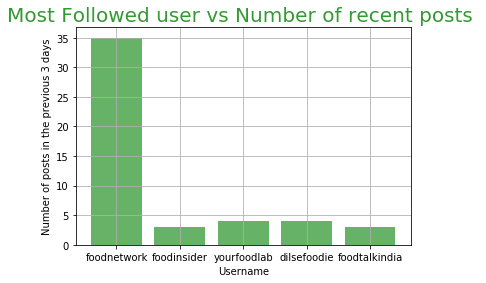

In [16]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='g',alpha=0.6)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

### Problem 2 : List of hashtags
Your friend also needs a list of hashtags that he should use in his posts.  
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.  
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.  
3.Create a csv file with two columns : the word and its frequency  
4.Now, find the hashtags that were most popular among these bloggers  
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.  

In [17]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements_by_class_name('v1Nh3')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements_by_class_name("xil3i")
                for hashtag in hashtags:
                    #appending in list
                    hashtags_list.append(hashtag.text)  
                
                #locating close button and clicking on it
                close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
                time.sleep(1)
                close.click()
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
        
    

In [18]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)

In [19]:
print(hashtags)

['#VivsTips', '#DeliciousMissBrown', '#WhatADissapointment', '#FreakshowCakes', '#WorstCooks', '#WorstCooks', '#WorstCooks', '#WorstCooks', '#HalloweenBakingChampionship', '#SouthernKitchen', '#arizona', '#statefair', '#corndog', '#chili', '#cincinnati', '#midwest', '#kfc', '#kfclocker', '#kfcjapan', '#ukranian', '#newyorkcity', '#food', '#dumplings', '#amazon', '#amazonprimeday', '#primeday', '#primeday2020', '#kitchendeals', '#friedchicken', '#atlanta', '#chicken', '#thaifriedchicken', '#friedchicken', '#thaifood', '#losangeles', '#recipes', '#pulao', '#foodporn', '#brightwin', '#foodiesofinstagram', '#foodlover', '#rice', '#recipeoftheday', '#mumbaifoodie', '#sanjyotkeer', '#mumbaistreetfood', '#mumbaifood', '#recipe', '#foodie', '#foodstagram', '#dosa', '#dosalover', '#indianclicks', '#indiancuisine', '#streetfood', '#recipe', '#foodie', '#indiancuisine', '#streetfood', '#foodporn', '#comfortfood', '#streetphotography', '#sanjyotkeer', '#food', '#navratri', '#noonionnogarlic', '#fo

##### 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [20]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#dilsefoodie 9
#sanjyotkeer 8
#foodporn 7
#streetfood 7
#recipe 6
#foodie 6
#comfortfood 6
#WorstCooks 4
#food 4
#recipeoftheday 4
#recipes 3
#foodiesofinstagram 3
#LesRochesConnect 3
#LesRochesWayOfLife 3
#GlionConnect 3
#GlionSpirit 3
#friedchicken 2
#mumbaifoodie 2
#mumbaistreetfood 2
#mumbaifood 2
#foodstagram 2
#indiancuisine 2
#yourfoodlab 2
#frankie 2
#paneer 2
#ContestAlert 2
#VivsTips 1
#DeliciousMissBrown 1
#WhatADissapointment 1
#FreakshowCakes 1
#HalloweenBakingChampionship 1
#SouthernKitchen 1
#arizona 1
#statefair 1
#corndog 1
#chili 1
#cincinnati 1
#midwest 1
#kfc 1
#kfclocker 1
#kfcjapan 1
#ukranian 1
#newyorkcity 1
#dumplings 1
#amazon 1
#amazonprimeday 1
#primeday 1
#primeday2020 1
#kitchendeals 1
#atlanta 1
#chicken 1
#thaifriedchicken 1
#thaifood 1
#losangeles 1
#pulao 1
#brightwin 1
#foodlover 1
#rice 1
#dosa 1
#dosalover 1
#indianclicks 1
#streetphotography 1
#navratri 1
#noonionnogarlic 1
#rolls 1
#streetstyle 1
#yummyfood 1
#noodles 1
#noodle 1
#reelsinstagram 1

##### 3.Create a csv file with two columns : the word and its frequency

In [21]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#dilsefoodie,9
1,#sanjyotkeer,8
2,#foodporn,7
3,#streetfood,7
4,#recipe,6
5,#foodie,6
6,#comfortfood,6
7,#WorstCooks,4
8,#food,4
9,#recipeoftheday,4


##### 4.Now, find the hashtags that were most popular among these bloggers

In [22]:
print(words_list[0][0])

#dilsefoodie


##### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

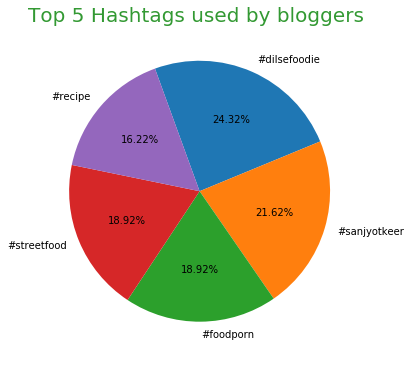

In [23]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

### Problem 3 : Followers : Likes ratio
You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:  
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.  
2.Calculate the average likes for a handle.  
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.  
4.Create a bar graph to depict the above obtained information.  

##### 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [115]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try :
            likes = []
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements_by_class_name('v1Nh3')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                try : 
                    #for getting like on video we need to first click on view then only we can like
                    views = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
                    views.click()
                    time.sleep(1)
                    
                    #locating like and clicking on it
                    like = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/div[4]/span')
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                    #just clicking one body to get original post back
                    driver.find_element_by_xpath('/html/body/div[4]').click()
                #if the post is image then this part will execute 
                except TimeoutException :
                    
                    like = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/button/span')
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                #locating close button and clicking on it
                close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
                time.sleep(1)
                close.click()
                                

                
            return likes
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
        
    

In [116]:
#dct will store username with list of likes
dct = {}
for user in handles : 
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of foodnetwork :
831 Likes
12235 Likes
23784 Likes
26151 Likes
34927 Likes
79026 Likes
9103 Likes
22217 Likes
7951 Likes
30405 Likes

Number of likes of the top 10 posts of foodinsider :
12529 Likes
12284 Likes
5130 Likes
9746 Likes
5597 Likes
9250 Likes
1395 Likes
8525 Likes
39934 Likes
14760 Likes

Number of likes of the top 10 posts of yourfoodlab :
15800 Likes
40727 Likes
24199 Likes
17368 Likes
21351 Likes
32545 Likes
21447 Likes
24166 Likes
19154 Likes
35241 Likes

Number of likes of the top 10 posts of dilsefoodie :
7187 Likes
24663 Likes
4868 Likes
14497 Likes
7696 Likes
12616 Likes
9900 Likes
10937 Likes
13709 Likes
15620 Likes

Number of likes of the top 10 posts of foodtalkindia :
349 Likes
241 Likes
763 Likes
667 Likes
497 Likes
187 Likes
396 Likes
661 Likes
279 Likes
1111 Likes



##### 2.Calculate the average likes for a handle.

In [118]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [120]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
foodnetwork : 24663
foodinsider : 11915
yourfoodlab : 25199
dilsefoodie : 12169
foodtalkindia : 515


##### 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [131]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    return foll_like

In [134]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handles
#extracing username from top_handles
top_handles_names = list(top_handles.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_handles, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
foodnetwork : 432
foodinsider : 182
yourfoodlab : 56
dilsefoodie : 51
foodtalkindia : 587


##### 4.Create a bar graph to depict the above obtained information.

In [135]:
#Plotting Bar Graph for average likes of each handle

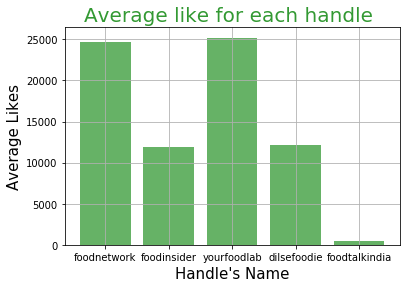

In [140]:
#for this I will use answer of problem 3.2 
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

In [141]:
# Plotting Bar Graph for average followers:like ratio of each handle

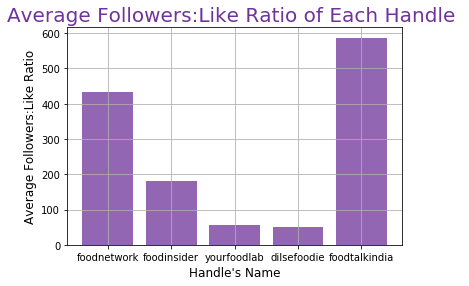

In [144]:
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()